In [23]:
def set_paths():

    import os
    import sys

    USECASES_SRC = os.path.join(os.environ.get('BDA_USER_HOME', ''), "repositorios", "use-cases")
    if USECASES_SRC not in sys.path:
        sys.path.append(USECASES_SRC)


set_paths()



In [4]:
from pyspark.sql.functions import (udf,
                        col,
                        decode,
                        when,
                        lit,
                        lower,
                        concat,
                        translate,
                        count,
                        sum as sql_sum,
                        max as sql_max,
                        min as sql_min,
                        avg as sql_avg,
                        greatest,
                        least,
                        isnull,
                        isnan,
                        struct, 
                        substring,
                        size,
                        length,
                        year,
                        month,
                        dayofmonth,
                        unix_timestamp,
                        date_format,
                        from_unixtime,
                        datediff,
                        to_date, 
                        desc,
                        asc,
                        countDistinct,
                        row_number,
                        rand,
                        countDistinct,
                        variance)
from pyspark.sql import Row, DataFrame, Column, Window
from pyspark.sql.types import DoubleType, StringType, IntegerType, DateType, ArrayType, StructType, StructField
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, SQLTransformer, OneHotEncoder, QuantileDiscretizer, Bucketizer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.regression import IsotonicRegression
import math
import operator
import numpy as np

In [24]:
from churn_nrt.src.utils.spark_session import get_spark_session

sc, spark, sql_context=get_spark_session(app_name="convergence_check")

In [45]:
churn_mobile=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=ompc_xsell_fijo/year=2020/month=7/day=22')

In [7]:
churn_mobile.count()

2641456

In [30]:
x=spark.read.load('/data/raw/vf_es/cvm/EXT_AC_CLIENTES/1.0/parquet/year=2020/month=7/day=16')

In [31]:
x.columns

['NIF_CLIENTE',
 'NUM_CLIENTE',
 'COD_ESTADO_GENERAL',
 'CLASE_CLI_COD_CLASE_CLIENTE',
 'TIPO_DOCUMENTO',
 'TRATAMIENTO',
 'NOMBRE',
 'PRIM_APELLIDO',
 'SEG_APELLIDO',
 'NOM_COMPLETO',
 'CTA_CORREO',
 'TEL_CONTACTO',
 'TEL_TRABAJO',
 'TEL_OTRO',
 'SMS',
 'TELEFONO_TESTA',
 'MOVIL',
 'DIR_COMPLETA',
 'COD_POSTAL',
 'MUNICIPIO',
 'COD_GESCAL_17',
 'COD_GOLDEN',
 'CENTRAL_OFFICE',
 'COD_X_NODO_PRIM',
 'COD_X_NODO_TERM',
 'FLAG_HUELLA_ARIEL',
 'FLAG_HUELLA_EUSKALTEL',
 'FLAG_HUELLA_FTTH',
 'FLAG_HUELLA_HFC',
 'FLAG_HUELLA_JAZZTEL',
 'FLAG_HUELLA_MOVISTAR',
 'FLAG_HUELLA_NEBA',
 'TIPO_NEBA',
 'FLAG_NH_PREVISTA',
 'FLAG_NH_REAL',
 'FLAG_ZC',
 'TIPO_HUELLA_FTTH',
 'VELOCIDAD_MAX_HFC',
 'FLAG_COBERTURA_ADSL',
 'COD_POSTAL_FACT',
 'TRAT_FACT',
 'NOMBRE_CLI_FACT',
 'APELLIDO1_CLI_FACT',
 'APELLIDO2_CLI_FACT',
 'DIR_NUM_DIRECCION',
 'CUENTA_BANCO',
 'MARRIAGE2HGBST_ELM',
 'GENDER2HGBST_ELM',
 'COD_SEGMENTO_NDS',
 'DES_SEGMENTO_NDS',
 'FECHA_NACIMIENTO',
 'ARPU_3M',
 'FECHA_ANTIGUEDAD_CLI',
 'FEC_

In [46]:
churn_mobile.limit(5).toPandas()

,nif,model_output,scoring,prediction,extra_info,time,executed_at,model_executed_at,predict_closing_date,msisdn,client_id,longitud
0,78088671H,xsell_fijo,0.064993,None,decil=1,None,None,None,None,None,None,9
1,60141486H,xsell_fijo,0.065998,None,decil=1,None,None,None,None,None,None,9
2,36094092G,xsell_fijo,0.066194,None,decil=1,None,None,None,None,None,None,9
3,O8276809X,xsell_fijo,0.066292,None,decil=1,None,None,None,None,None,None,9
4,61469058O,xsell_fijo,0.066357,None,decil=1,None,None,None,None,None,None,9


In [24]:
churn_competitor.count()

3204105

In [37]:
churn_mobile.limit(5).toPandas()

,nif,model_output,scoring,prediction,extra_info,time,executed_at,model_executed_at,predict_closing_date,msisdn,client_id,longitud
0,38927700N,xsell_tv,0.047828,None,decil=1,None,None,None,None,None,None,9
1,68938230O,xsell_tv,0.047966,None,decil=1,None,None,None,None,None,None,9
2,29491419K,xsell_tv,0.048014,None,decil=1,None,None,None,None,None,None,9
3,69873354D,xsell_tv,0.048036,None,decil=1,None,None,None,None,None,None,9
4,45278035M,xsell_tv,0.048267,None,decil=1,None,None,None,None,None,None,9


In [6]:
churn_fbb=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=churn_fbb/year=2020/month=6/day=26')

In [22]:
churn_fbb.count()

1835789

In [23]:
churn_fbb.limit(5).toPandas()

,executed_at,model_executed_at,predict_closing_date,msisdn,client_id,nif,model_output,scoring,prediction,extra_info,time
0,2020-06-29 11:59:12,2020-06-29 11:59:12,20200614,,995676445,,,0.146809,,decil=0;flag_propension=0;bound=hard,115912
1,2020-06-29 11:59:12,2020-06-29 11:59:12,20200614,,656325336,,,0.146809,,decil=0;flag_propension=0;bound=hard,115912
2,2020-06-29 11:59:12,2020-06-29 11:59:12,20200614,,337609814,,,0.146809,,decil=0;flag_propension=0;bound=hard,115912
3,2020-06-29 11:59:12,2020-06-29 11:59:12,20200614,,265072726,,,0.146809,,decil=0;flag_propension=0;bound=hard,115912
4,2020-06-29 11:59:12,2020-06-29 11:59:12,20200614,,942410385,,,0.146809,,decil=0;flag_propension=0;bound=hard,115912


In [7]:
churn_score_nif=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=churn_score_nif/year=2020/month=6/day=26')

In [20]:
churn_score_nif.count()

3047071

In [21]:
churn_score_nif.limit(5).toPandas()

,executed_at,model_executed_at,predict_closing_date,msisdn,client_id,nif,model_output,scoring,prediction,extra_info,time
0,2020-06-29 13:38:24,2020-06-29 13:38:24,20200614,,,14660332W,,0.567222,,decil=0;flag_propension=0;bound=none;Risk=Mobile,133824
1,2020-06-29 13:38:24,2020-06-29 13:38:24,20200614,,,24434707P,,0.567222,,decil=0;flag_propension=0;bound=none;Risk=FBB,133824
2,2020-06-29 13:38:24,2020-06-29 13:38:24,20200614,,,48741156Z,,0.567222,,decil=0;flag_propension=0;bound=none;Risk=FBB,133824
3,2020-06-29 13:38:24,2020-06-29 13:38:24,20200614,,,30828261P,,0.567222,,decil=0;flag_propension=0;bound=none;Risk=FBB,133824
4,2020-06-29 13:38:24,2020-06-29 13:38:24,20200614,,,53132833A,,0.567222,,decil=0;flag_propension=0;bound=none;Risk=FBB,133824


In [9]:
early_inactivity1=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=prepaid_early_inactivity_pega/year=2020/month=6/day=26')
early_inactivity2=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=prepaid_early_inactivity_pega/year=2020/month=6/day=29')
early_inactivity3=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=prepaid_early_inactivity_pega/year=2020/month=6/day=30')

In [18]:
early_inactivity3.count()

171

In [19]:
early_inactivity3.limit(5).toPandas()

,executed_at,model_executed_at,predict_closing_date,msisdn,client_id,nif,model_output,scoring,prediction,extra_info,time
0,2020-06-30 15:50:20,2020-06-30 15:50:20,20200630,643616136,NaN,NaN,NaN,0.028020,0.0,NaN,155020
1,2020-06-30 15:50:20,2020-06-30 15:50:20,20200630,679426558,NaN,NaN,NaN,0.034209,0.0,NaN,155020
2,2020-06-30 15:50:20,2020-06-30 15:50:20,20200630,612905003,NaN,NaN,NaN,0.040760,0.0,NaN,155020
3,2020-06-30 15:50:20,2020-06-30 15:50:20,20200630,614558365,NaN,NaN,NaN,0.081212,0.0,NaN,155020
4,2020-06-30 15:50:20,2020-06-30 15:50:20,20200630,637233187,NaN,NaN,NaN,0.082665,0.0,NaN,155020


In [10]:
age_prediction=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=age_prediction/year=2020/month=6/day=0')

In [12]:
age_prediction.count()

4594129

In [13]:
age_prediction.limit(5).toPandas()

,executed_at,model_executed_at,predict_closing_date,msisdn,client_id,nif,model_output,scoring,prediction,extra_info,time
0,2020-06-26 17:32:44,2020-06-26 17:32:44,20200614,600000229,None,None,2,NaN,Older than 30,None,173244
1,2020-06-26 17:32:44,2020-06-26 17:32:44,20200614,600007274,None,None,2,NaN,Older than 30,None,173244
2,2020-06-26 17:32:44,2020-06-26 17:32:44,20200614,600007642,None,None,1,NaN,Between 25 and 30,None,173244
3,2020-06-26 17:32:44,2020-06-26 17:32:44,20200614,600007818,None,None,2,NaN,Older than 30,None,173244
4,2020-06-26 17:32:44,2020-06-26 17:32:44,20200614,600009853,None,None,2,NaN,Older than 30,None,173244


## Portouts

-Monitorizar volumenes: masmovil, movistar, orange, others, Jazztel dentro de others (para diferentes fechas): Sept, Oct, Nov, Dic, Enero

In [4]:
from churn_nrt.src.data.sopos_dxs import MobPort

from pyspark.sql import functions as f
from pyspark.sql import functions as F
from churn_nrt.src.data.customer_base import CustomerBase
from churn_nrt.src.utils.date_functions import (
    get_last_day_of_month,
    move_date_n_yearmonths)



In [8]:
dates=['20190831','20190930','20191031','20191130','20191231','20200131']

In [9]:
#Sin aplicar filtros

columns = ['date','masmovil', 'movistar','orange','others']
vals = [(0, 0, 0,0,0)]

df = spark.createDataFrame(vals, columns)

for date in dates:

    portab_table = (  # MobPort new
                MobPort(spark, churn_window=30)
                    .get_module(date, save=False, save_others=False, force_gen=True)
                    .select("target_operator")
            )  # get portouts of the next 30 days
    
    
    masmovil=portab_table.filter(f.col("target_operator")=='masmovil').count()
    movistar=portab_table.filter(f.col("target_operator")=='movistar').count()
    orange=portab_table.filter(f.col("target_operator")=='orange').count()
    others=portab_table.filter(f.col("target_operator")=='others').count()
    
    newRow = spark.createDataFrame([(date,masmovil,movistar,orange,others)], columns)
    df = df.union(newRow)


[DataTemplate] __init__ | module name = mob_port/30 | path = /data/udf/vf_es/churn_nrt/mob_port/30 | verbose = True
[DataTemplate] get_module | module mob_port/30 - for closing_day=20190831 save=False save_others=False force_gen=True
[DataTemplate] get_module | args: () | kwargs: {}
[MobPort] check_valid_params | Params ok
[DataTemplate] get_module | Module will be generated since force_gen parameter was set to True. 
[MobPort] check_valid_params | Params ok
[Info get_mobile_portout_requests] - Port-out requests for mobile services during period 20190831-20190930: 180968
[DataTemplate] get_module | module 'mob_port/30' | Elapsed time in build_module function: 1.06874041557 minutes
[DataTemplate] get_module | module 'mob_port/30' | Module will not be saved (save=False and is_default_module()=True)
[DataTemplate] __init__ | module name = mob_port/30 | path = /data/udf/vf_es/churn_nrt/mob_port/30 | verbose = True
[DataTemplate] get_module | module mob_port/30 - for closing_day=20190930 sa

In [19]:
df2 = df2.filter((df2.date != 0.0))

In [20]:
df2.toPandas() 

,date,masmovil,movistar,orange,others
0,20190831,23315,35191,21533,23349
1,20190930,24755,28244,22099,25183
2,20191031,21395,31291,21997,23980
3,20191130,21744,24850,20217,18651
4,20191231,28071,26331,20417,26051


In [ ]:
df = df.filter((df.date != 0.0))

In [5]:
#Aplicando filtros

columns = ['date','masmovil', 'movistar','orange','others']
vals = [(0, 0, 0,0,0)]

df2 = spark.createDataFrame(vals, columns)

for date in dates:

    portab_table = (  # MobPort new
                MobPort(spark, churn_window=30)
                    .get_module(date, save=False, save_others=False, force_gen=True)
                    .select("msisdn","target_operator")
            )  # get portouts of the next 30 days
    
    
    
    cust_base = (
        CustomerBase(spark)
            .get_module(date, save=False, save_others=False, force_gen=True)
            .filter(F.col("rgu") == "mobile")
            .select("msisdn")
    )  # get mobile customer base for training


    
    
    
    previous_year_month = move_date_n_yearmonths(
        date[0:6], -3
    )  # 'YYYYMM' of three months ago

    # if the day of the current date is the last day of the month
    if (date[6] == "3") | (date[6:8] == "28") | (date[6:8] == "29"):

        previous_date = get_last_day_of_month(
            previous_year_month + "01"
        )  # returns last day of three months ago

    else:

        previous_date = (
                previous_year_month + date[6:8]
        )  # returns same day of three months ago

        
    active_customers_three_months = (
        CustomerBase(spark)
            .get_module(previous_date, save=False, save_others=False, force_gen=True)
            .filter(F.col("rgu") == "mobile")
            .select("msisdn")
            .distinct()
    )# get mobile clients who were in the base three months ago

    # join active customers three months ago with ids
    
    active_customers = cust_base.join(active_customers_three_months, on="msisdn", how="inner")

    
    portab_active = active_customers.join(portab_table, on="msisdn", how="left").fillna(
            "none")  # label customer base: join with portouts and replace NA by 'none' (customers who do not churn)

    
    masmovil=portab_active.filter(f.col("target_operator")=='masmovil').count()
    movistar=portab_active.filter(f.col("target_operator")=='movistar').count()
    orange=portab_active.filter(f.col("target_operator")=='orange').count()
    others=portab_active.filter(f.col("target_operator")=='others').count()
    
    newRow = spark.createDataFrame([(date,masmovil,movistar,orange,others)], columns)
    df2 = df2.union(newRow)

[DataTemplate] __init__ | module name = mob_port/30 | path = /data/udf/vf_es/churn_nrt/mob_port/30 | verbose = True
[DataTemplate] get_module | module mob_port/30 - for closing_day=20200131 save=False save_others=False force_gen=True
[DataTemplate] get_module | args: () | kwargs: {}
[MobPort] check_valid_params | Params ok
[DataTemplate] get_module | Module will be generated since force_gen parameter was set to True. An existing module in path will be ignored
[MobPort] check_valid_params | Params ok
[Info get_mobile_portout_requests] - Port-out requests for mobile services during period 20200131-20200301: 169463
[DataTemplate] get_module | module 'mob_port/30' | Elapsed time in build_module function: 0.783414049943 minutes
[DataTemplate] get_module | module 'mob_port/30' | Module will not be saved (save=False and is_default_module()=True)
[DataTemplate] __init__ | module name = customer_base | path = /data/udf/vf_es/churn_nrt/customer_base | verbose = True
[DataTemplate] get_module | m

In [10]:
dates=['20190831','20190930','20191031','20191130','20191231','20200131']

columns = ['date','masmovil', 'movistar','orange','others']
vals = [('20190831',23315,35191,21533,23349),
        ('20190930',24755,28244,22099,25183),
       ('20191031',21395,31291,21997,23980),
       ('20191130',21744,24850,20217,18651),
       ('20191231',28071,26331,20417,26051),
       ('20200131',28836,26488,17744,25991)]

df2 = spark.createDataFrame(vals, columns)

In [11]:
df2.toPandas()

,date,masmovil,movistar,orange,others
0,20190831,23315,35191,21533,23349
1,20190930,24755,28244,22099,25183
2,20191031,21395,31291,21997,23980
3,20191130,21744,24850,20217,18651
4,20191231,28071,26331,20417,26051
5,20200131,28836,26488,17744,25991


**Get ids for dropping correlated vars**

In [4]:
x=spark.read.load('/data/attributes/vf_es/model_outputs/model_scores/model_name=service_base_segmentation/year=2020/month=6/day=0')

In [ ]:
x.select('extra_info').limit(5).show()

In [8]:
x.columns

['executed_at',
 'model_executed_at',
 'predict_closing_date',
 'model_output',
 'scoring',
 'prediction',
 'extra_info',
 'time',
 'msisdn',
 'nif',
 'client_id']

In [ ]:
x.toPandas().to_csv('early_inactivity.csv')

In [ ]:
x.repartition(300).write.save(
            '/data/udf/vf_es/churn/churn_competitor_model/v2/multiclase/pred_20191231_production',
            format="parquet",
            mode="overwrite",
        )


In [ ]:
x=spark.read.load('/data/udf/vf_es/churn/churn_score_nif/v2/multiclase/pred_20191231_production')

In [ ]:
x.limit(5).toPandas()

In [ ]:
x.count()

In [ ]:
from churn_nrt.src.projects.models.propensity_operators.version2.input_vars_new import *

In [ ]:
numerical = get_num_vars(x)

In [ ]:
x=x.select(numerical)

In [ ]:
x.repartition(1).write.csv('corr_fecha', header=True)

In [ ]:
import pandas as pd

feat_imp=pd.read_csv('feat_imp.csv',sep=';')
list_var=feat_imp.Variable.tolist()

## Get certainity for certain volume

Busco el threshold que se correspondería a ese volumen para las predicciones de test, y miro el F1 y accuracy para ese threshold en la tabla que tengo guardada

In [4]:
preds=spark.read.load('/data/udf/vf_es/churn/churn_competitor_model/v2/multiclase/pred_test_20200131_certainity')

In [5]:
preds=preds.select('certainity_2').orderBy('certainity_2',ascending=True)

In [6]:
perc=[0.05,0.1,0.15,0.2,0.25,
      0.3,0.35,0.4,0.45,0.5,0.55,
      0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95,1]

In [7]:
volume=[]
for i in range(0,len(perc)):
    x=int(round(5400359*perc[i],0))
    volume+=[x]   

In [8]:
umbrales=[]

for i in range(0,len(volume)):

    threshold=preds.limit(volume[i]).collect()[volume[i]-1][0]
    umbrales+=[threshold]

In [9]:
preds_eval=spark.read.load('/data/udf/vf_es/churn/churn_competitor_model/v2/multiclase/pred_20191231_evaluation')

In [10]:
from  pyspark.sql.functions import log

preds_eval = preds_eval.withColumn("certainity_2", -(preds_eval["prob_array"].getItem(0)*log(preds_eval["prob_array"].getItem(0))
                                          +preds_eval["prob_array"].getItem(1)*log(preds_eval["prob_array"].getItem(1))
                                          +preds_eval["prob_array"].getItem(2)*log(preds_eval["prob_array"].getItem(2))
                                          +preds_eval["prob_array"].getItem(3)*log(preds_eval["prob_array"].getItem(3)))
                        )

In [11]:
percentage=[5,10,15,20,25,
      30,35,40,45,50,55,
      60,65,70,75,80,85,90,95,100]

In [5]:
import pandas as pd
preds_eval=pd.read_csv('volume_certainity_metrics.csv')

In [12]:
pred_pd=preds_eval.toPandas()
from sklearn.metrics import f1_score, accuracy_score

threshold = umbrales

columns = ['% volumen cartera','certainity threshold', 'F1 score','acuracy','accuracy multilabel']
vals = [(0, 0, 0,0,0)]

df = spark.createDataFrame(vals, columns)

for i in range(0,(len(threshold))):

    pred=pred_pd[pred_pd['certainity_2']<=threshold[i]]
    count=pred.shape[0]
    perc_cartera=percentage[i]
    accuracy_multi=float(pred[pred['acierto_multilabel']==1].shape[0])/float(count)
    accuracy=accuracy_score(pred['label'], pred['prediction'])
    f1=f1_score(pred['label'], pred['prediction'], average='weighted')
    newRow = spark.createDataFrame([(perc_cartera,threshold[i],f1.item(),accuracy.item(),accuracy_multi)], columns)
    df = df.union(newRow)
    

In [13]:
df=df.filter(col('% volumen cartera')!=0.00)

In [ ]:
df.toPandas()

## Gráfico

In [10]:
df=preds_eval

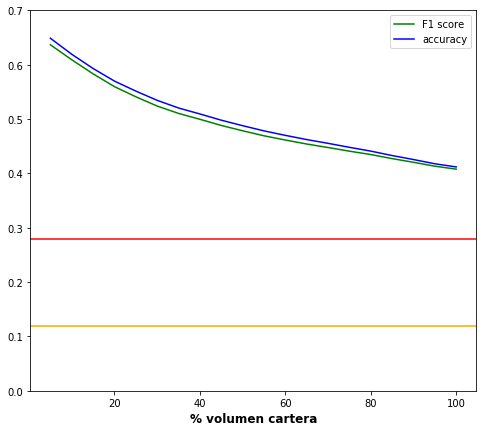

In [14]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,7))

font={'fontsize':12, 'fontweight': 'bold'}

ax.plot(df['% volumen cartera'], df['F1 score'],color='green')
ax.plot(df['% volumen cartera'], df['accuracy'],color='blue')
plt.axhline(y=0.12, color='orange', linestyle='-')
plt.axhline(y=0.28, color='r', linestyle='-')

ax.set_ylim([0.0,0.7])

ax.set_xlabel("% volumen cartera", fontdict = font)
ax.legend(loc='best')

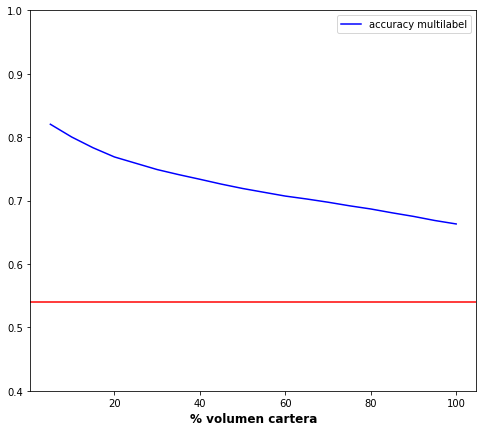

In [17]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,7))

font={'fontsize':12, 'fontweight': 'bold'}

ax.plot(df.toPandas()['% volumen cartera'], df.toPandas()['accuracy multilabel'],color='blue')
plt.axhline(y=0.54, color='o', linestyle='-')


ax.set_ylim([0.4,1])

ax.set_xlabel("% volumen cartera", fontdict = font)
ax.legend(loc='best')

## Model production

In [ ]:
x=spark.read.load('/data/udf/vf_es/churn/portabPropension_model/pred_test_20200514_orange')

In [ ]:
y=spark.read.load('/data/udf/vf_es/churn/portabPropension_model/pred_test_20200514_others')

In [ ]:
x = (
    x.withColumnRenamed("msisdn", "msisdn_" + 'orange') \
        .withColumnRenamed("model_score", "calib_score_" + 'orange') \
        .select("msisdn_" + 'orange', "calib_score_" + 'orange')
)


In [ ]:
y = (
    y.withColumnRenamed("msisdn", "msisdn_" + 'others') \
        .withColumnRenamed("model_score", "calib_score_" + 'others') \
        .select("msisdn_" + 'movistar', "calib_score_" + 'others')
)


In [ ]:
x.repartition(300).write.save(
        '/data/udf/vf_es/churn/portabPropension_model/pred_20200514_orange',
        format="parquet",
        mode="overwrite",
    )

In [ ]:
y.repartition(300).write.save(
        '/data/udf/vf_es/churn/portabPropension_model/pred_20200514_others',
        format="parquet",
        mode="overwrite",
    )